# 타이타닉 데이터 생존 예측

## 변수설명

* Passengerid: 탑승자 데이터 일련번호
* Survived: 생존 여부 (0 = 사망, 1 = 생존)
* Pclass: 티켓의 선실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
* name: 탑승자 이름
* Sex: 탑승자 성별
* Age: 탑승자 나이
* SibSp: 함께 탑승한 형제자매 또는 배우자 인원수
* Parch: 함께 탑승한 부모님 , 어린이 인원수
* Fare: 요금
* Ticket: 티켓 번호
* Cabin: 선실 번호
* Embarked: 중간 정착 항구 (C = Cherbourg, Q = Queenstowm, S = Southampton)
* boat : 탈출을 했다면 탑승한 보트의 번호
* body: 사망자 확인 번호
* home.dest: 고향/목적지


## 1. 데이터 불러오기

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
csvFile = 'C:/Users/chunc/Desktop/취업캠프/python/python/머신러닝과 딥러닝/titanic3.csv'
titanic_df = pd.read_csv(csvFile)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
# 훈련 자료 int, float 변수 통계치
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
# 훈련 자료 object 변수 통계치
titanic_df.describe(include = 'O')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [6]:
# embarked 변수의 결측값 대체법 탐구
titanic_df[titanic_df['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [7]:
# 결측치 제거 및 대체
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace = True)
titanic_df['cabin'].fillna('N', inplace = True)
titanic_df['embarked'].fillna('N', inplace = True)
titanic_df['fare'].fillna(titanic_df['fare'].mean(), inplace = True)
titanic_df['boat'].fillna('N', inplace = True)
titanic_df['body'].fillna(titanic_df['body'].mean(), inplace = True)
titanic_df['home.dest'].fillna('N', inplace =True)

In [8]:
titanic_df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,N,160.809917,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,N,135.000000,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,N,160.809917,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,160.809917,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,160.809917,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,N,160.809917,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,160.809917,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,N,C,N,22.000000,"Montevideo, Uruguay"


In [9]:
print(' Sex값 분포:\n', titanic_df['sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['embarked'].value_counts())

 Sex값 분포:
 male      843
female    466
Name: sex, dtype: int64

 Cabin 값 분포:
 N                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
                   ... 
E63                   1
B102                  1
B39                   1
D40                   1
F38                   1
Name: cabin, Length: 187, dtype: int64

 Embarked 값 분포:
 S    914
C    270
Q    123
N      2
Name: embarked, dtype: int64


데이터를 보면, N이 1014건으로 가장 많은 것이 특이하며, 속성값이 제대로 정리가 되지 않아보인다. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보인다.

In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   float64
 13  home.dest  1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [11]:
# 'cabin' 피처의 데이터는 첫번째 문자만 선택
titanic_df['cabin'] = titanic_df['cabin'].str[:1]
print(titanic_df['cabin'].head())

0    B
1    C
2    C
3    C
4    C
Name: cabin, dtype: object


In [12]:
# 결측값 확인
print(titanic_df.isnull().sum())

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


## 2-1. 데이터 분석

In [13]:
# 선실등급 별 평균 운임 요금
titanic_df[['pclass', 'fare']].groupby(['pclass'], as_index = False).mean()

,pclass,fare
0,1,87.508992
1,2,21.179196
2,3,13.331087


In [14]:
# 성별에 따른 생존여부(0: 사망, 1: 생존)
titanic_df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

In [15]:
# 성별에 따른 생존률 확인
titanic_df[['sex', 'survived']].groupby(['sex'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [16]:
# 성별이 여성인 사람의 생존율 계산을 통해 확인
female = titanic_df[titanic_df['sex'] == 'female']['survived']
rate = sum(female) / len(female)
print(rate)

0.7274678111587983


* 여성의 생존비율이 높은 것을 알 수 있다.

In [17]:
# 객실 등급에 따른 생존률 확인
titanic_df[['pclass', 'survived']].groupby(['pclass'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


* 객실등급이 1등급인 사람들의 생존률이 높다.

In [18]:
# 동반한 형제자매, 배우자 수에 따른 생존률 확인
titanic_df[['sibsp', 'survived']].groupby(['sibsp'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,sibsp,survived
1,1,0.510972
2,2,0.452381
0,0,0.346801
3,3,0.300000
4,4,0.136364
5,5,0.000000
6,8,0.000000


In [19]:
# 동반 부모 자식수에 따른 생존률 확인
titanic_df[['parch', 'survived']].groupby(['parch'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,parch,survived
3,3,0.625000
1,1,0.588235
2,2,0.504425
0,0,0.335329
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


* 동행자 수가 적을수록 생존율이 높다.

In [20]:
# 'sibsp'와 'parch'를 통합한 새로운 변수 생성
titanic_df['familySize'] = titanic_df['sibsp'] + titanic_df['parch'] + 1
titanic_df[['familySize', 'survived']].groupby(['familySize'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,familySize,survived
3,4,0.697674
2,3,0.566038
1,2,0.536170
0,1,0.302532
4,5,0.272727
6,7,0.250000
5,6,0.200000
7,8,0.000000
8,11,0.000000


* familysize가 1인것은 가족을 동반하지 않을믈 의미한다.

In [21]:
# 정착항구에 따른 생존율 확인(C = Cherbourg, Q = Queenstowm, S = Southampton)
titanic_df[['embarked', 'survived']].groupby(['embarked'], as_index = False).mean().sort_values(by = 'survived', ascending = False)

,embarked,survived
1,N,1.000000
0,C,0.555556
2,Q,0.357724
3,S,0.332604


In [22]:
# 성씨(Mr, Mrs등)에 따른 생존률 확인

# 이름에서 성씨만 분리
# titanic_df['name'][0].split(',')[1].split('.')[0]
conv_name = lambda x: x.split(',')[1].split('.')[0]
titanic_df['title'] = titanic_df['name'].apply(conv_name)

In [23]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,familySize,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B,S,2,160.809917,"St Louis, MO",1,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C,S,11,160.809917,"Montreal, PQ / Chesterville, ON",4,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C,S,N,160.809917,"Montreal, PQ / Chesterville, ON",4,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C,S,N,135.000000,"Montreal, PQ / Chesterville, ON",4,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C,S,N,160.809917,"Montreal, PQ / Chesterville, ON",4,Mrs


In [24]:
titanic_df['title'].unique()

array([' Miss', ' Master', ' Mr', ' Mrs', ' Col', ' Mme', ' Dr', ' Major',
       ' Capt', ' Lady', ' Sir', ' Mlle', ' Dona', ' Jonkheer',
       ' the Countess', ' Don', ' Rev', ' Ms'], dtype=object)

In [25]:
# (Mlle와 Ms 는 Miss의, Ms는 Mrs의 불어식 표현)
# 1. [' Miss', ' Master', 'Rare', ' Mr', ' Mrs', ' Mme', ' Mlle', ' Ms']의 항목은 제외하고 Rare로 통합
titanic_df['title'] = titanic_df['title'].replace([' Col', ' Dr', ' Major', ' Capt', ' Lady', ' Sir', ' Dona', ' Jonkheer',\
       ' the Countess', ' Don', ' Rev'], 'Rare', inplace = False)
titanic_df['title'].unique()

array([' Miss', ' Master', ' Mr', ' Mrs', 'Rare', ' Mme', ' Mlle', ' Ms'],
      dtype=object)

In [26]:
titanic_df['title'] = titanic_df['title'].replace(' Mlle', ' Miss', inplace = False)
titanic_df['title'] = titanic_df['title'].replace(' Mme', ' Miss', inplace = False)
titanic_df['title'] = titanic_df['title'].replace(' Ms', ' Mrs', inplace = False)
titanic_df['title'].unique()

array([' Miss', ' Master', ' Mr', ' Mrs', 'Rare'], dtype=object)

In [27]:
# 성씨에 따른 생존율 확인
titanic_df[['title', 'survived']].groupby(['title'], as_index = False).mean()

,title,survived
0,Master,0.508197
1,Miss,0.680608
2,Mr,0.162483
3,Mrs,0.783920
4,Rare,0.379310


In [28]:
# title변수 범주화
title_mapping = {' Mr':1, ' Miss':2, ' Mrs':3, ' Master':4, 'Rare':5}
titanic_df['title'] = titanic_df['title'].map(title_mapping)
titanic_df['title'] = titanic_df['title'].fillna(0)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,familySize,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B,S,2,160.809917,"St Louis, MO",1,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C,S,11,160.809917,"Montreal, PQ / Chesterville, ON",4,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C,S,N,160.809917,"Montreal, PQ / Chesterville, ON",4,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C,S,N,135.000000,"Montreal, PQ / Chesterville, ON",4,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C,S,N,160.809917,"Montreal, PQ / Chesterville, ON",4,3


## 2-2. 데이터 시각화

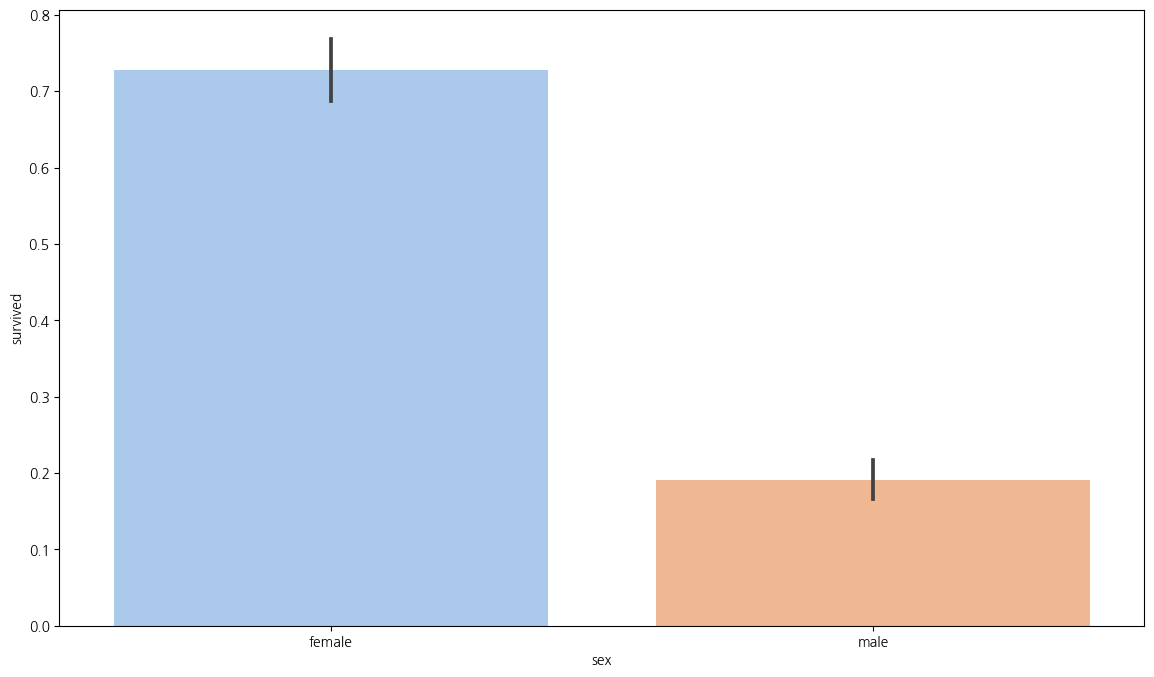

In [29]:
# 성별에 따른 생존률
plt.figure(figsize = (14, 8))
sns.barplot(x = 'sex', y = 'survived', palette = 'pastel', data = titanic_df)
plt.show()

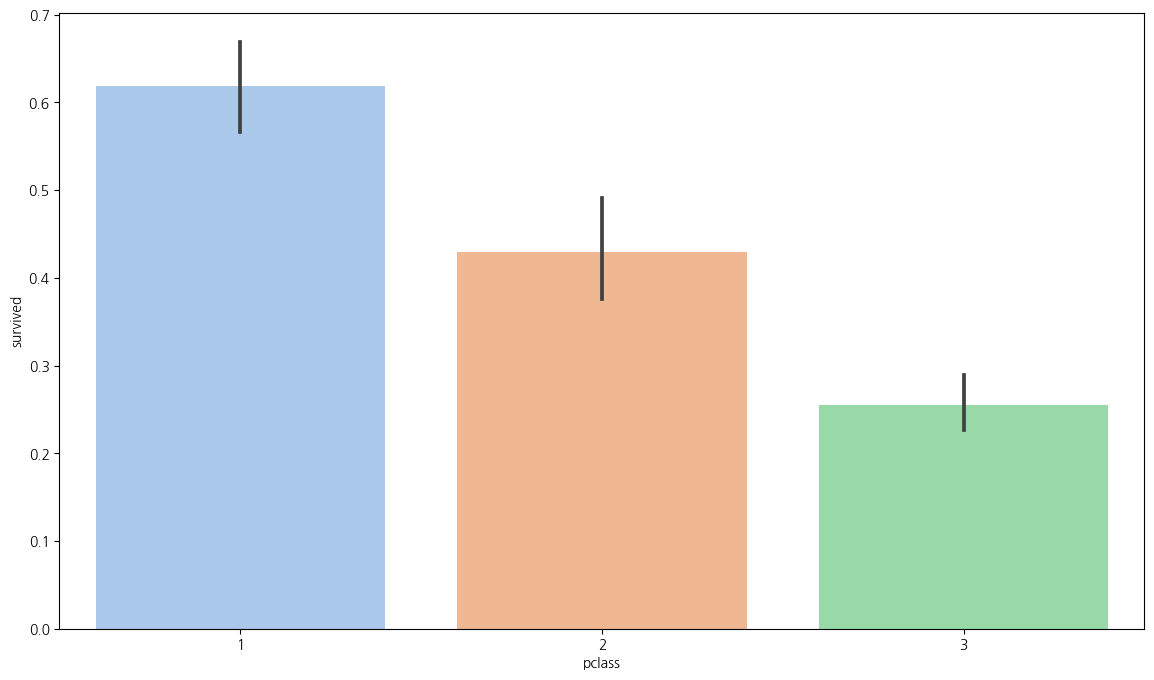

In [30]:
# 객실 등급에 따른 생존률
plt.figure(figsize = (14, 8))
sns.barplot(x = 'pclass', y = 'survived', palette = 'pastel',data = titanic_df)
plt.show()

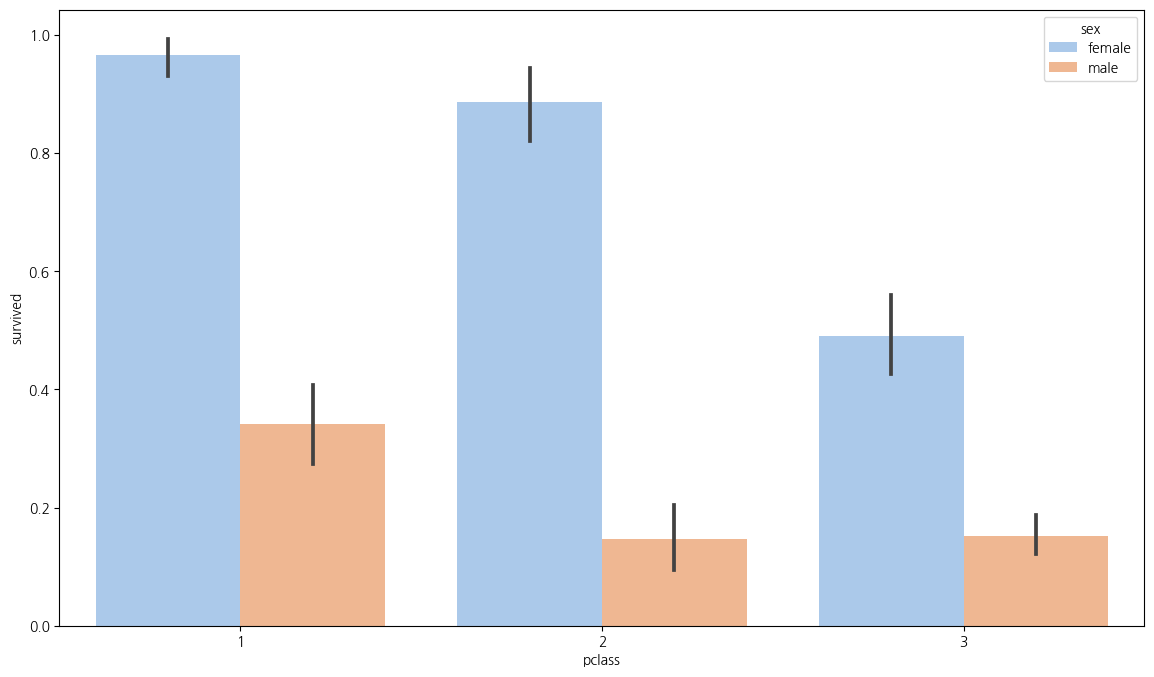

In [31]:
# 객실 등급, 성별에 따른 생존률
plt.figure(figsize = (14, 8))
sns.barplot(x = 'pclass', y = 'survived', hue = 'sex', palette = 'pastel', data = titanic_df)
plt.show()

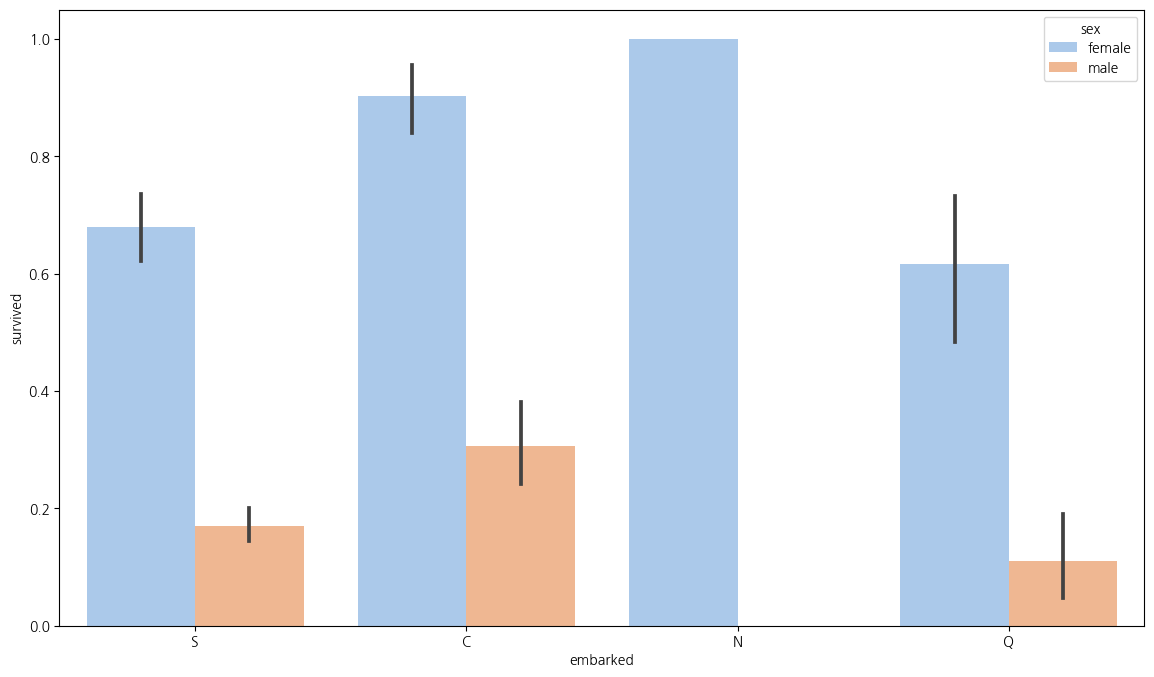

In [32]:
# 정착항구에 따른 생존률
plt.figure(figsize = (14, 8))
sns.barplot(x = 'embarked', y = 'survived', hue = 'sex', palette = 'pastel', data = titanic_df)
plt.show()

In [33]:
# 연령에 따른 생존률 비교

def get_category(age):
    cat = ''
    if age <= -1:
        cat = 'Unknown'
    elif age <= 5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 18:
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35:
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'

    return cat

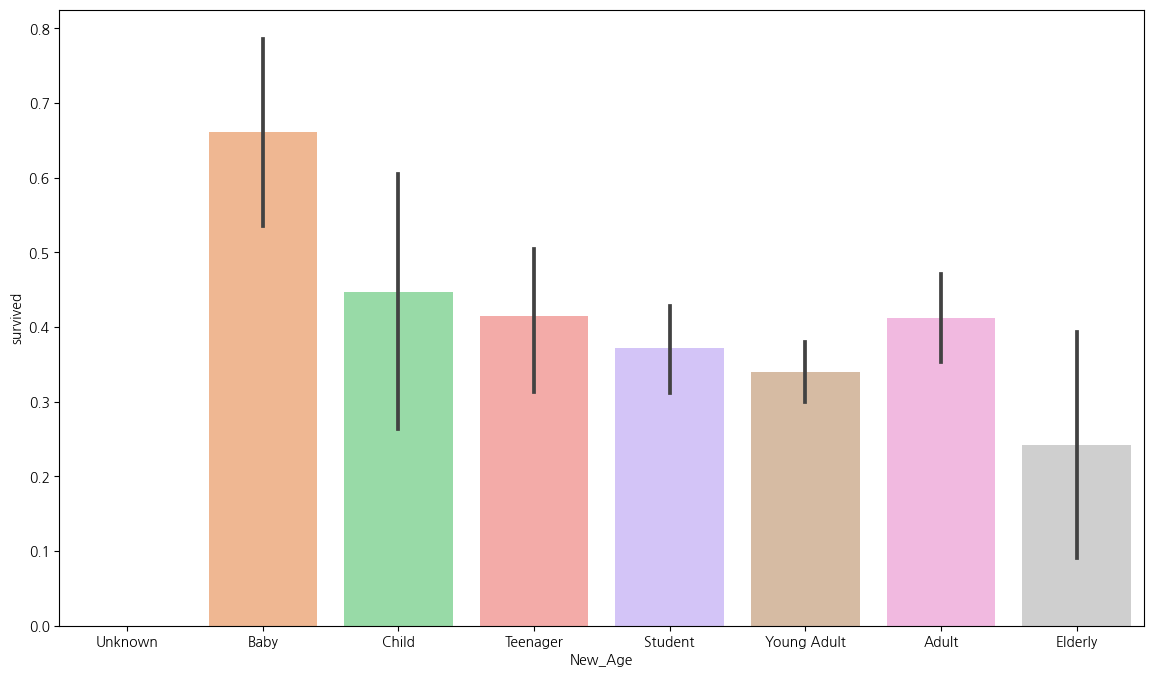

In [34]:
# 시각화: 연령별 생존률
plt.figure(figsize = (14, 8))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
titanic_df['New_Age'] = titanic_df['age'].apply(lambda x: get_category(x))
sns.barplot(x = 'New_Age', y = 'survived', palette = 'pastel', data = titanic_df, order = group_names)
plt.show()

* 나이가 어릴 수록 생존률이 높다.

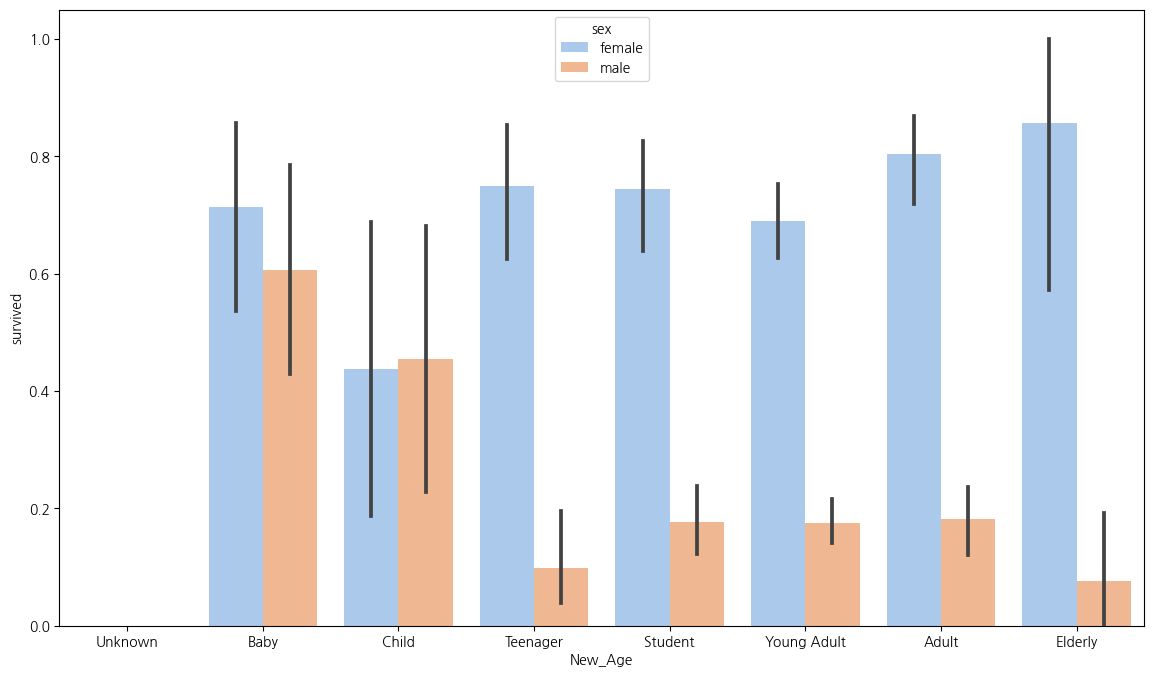

In [35]:
# 시각화: 연령별, 성별 생존률
plt.figure(figsize = (14, 8))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
titanic_df['New_Age'] = titanic_df['age'].apply(lambda x: get_category(x))
sns.barplot(x = 'New_Age', y = 'survived', palette = 'pastel', data = titanic_df, hue = 'sex', order = group_names)
plt.show()
titanic_df.drop('New_Age', axis = 1, inplace = True)

* 연령별로도 여성 생존자의 비율이 높음을 알 수 있다

다음과 같은 방법으로도 시각화가 가능하다.

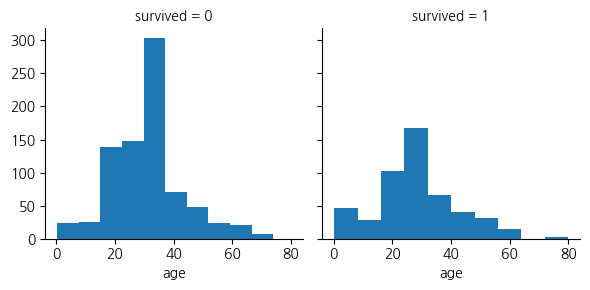

In [36]:
# 성별에 따른 생존여부
g = sns.FacetGrid(titanic_df, col = 'survived')
g.map(plt.hist, 'age')

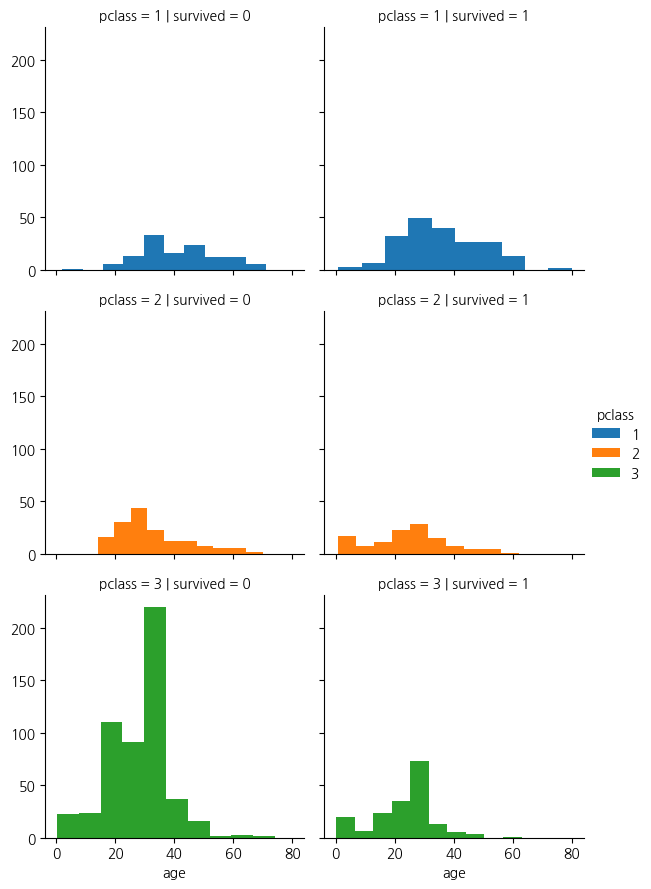

In [37]:
# 객실등급과 생존여부에 따른 연령분포
grid = sns.FacetGrid(titanic_df, col = 'survived', row = 'pclass', hue = 'pclass')
grid.map(plt.hist, 'age')
grid.add_legend()

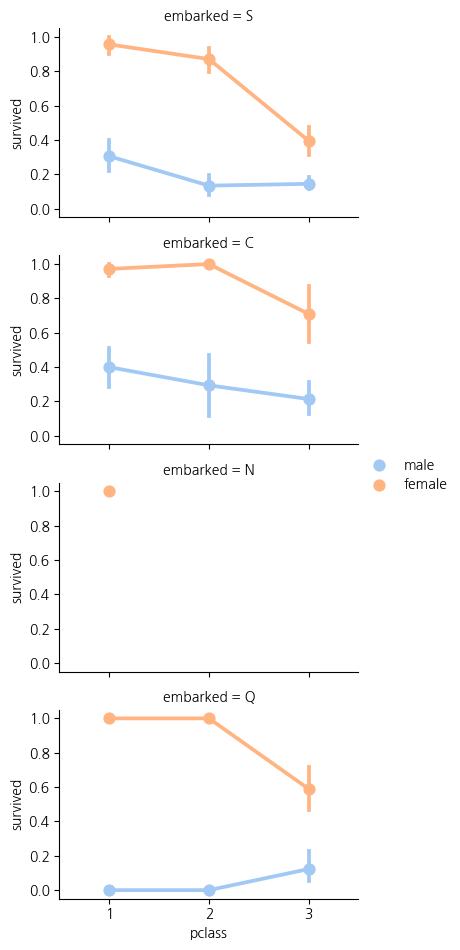

In [38]:
# 승선항과 객실등급에 따른 생존률
grid = sns.FacetGrid(titanic_df, row = 'embarked', height = 2.4, aspect = 1.6)
# Pointplot으로 시각화, x: 객실 등급, y: 생존 여부, 색깔: 성별, x축 순서: [1, 2, 3], 색깔 순서: [남성, 여성]
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette = 'pastel', order = [1, 2, 3], hue_order = ['male', 'female'])
grid.add_legend()

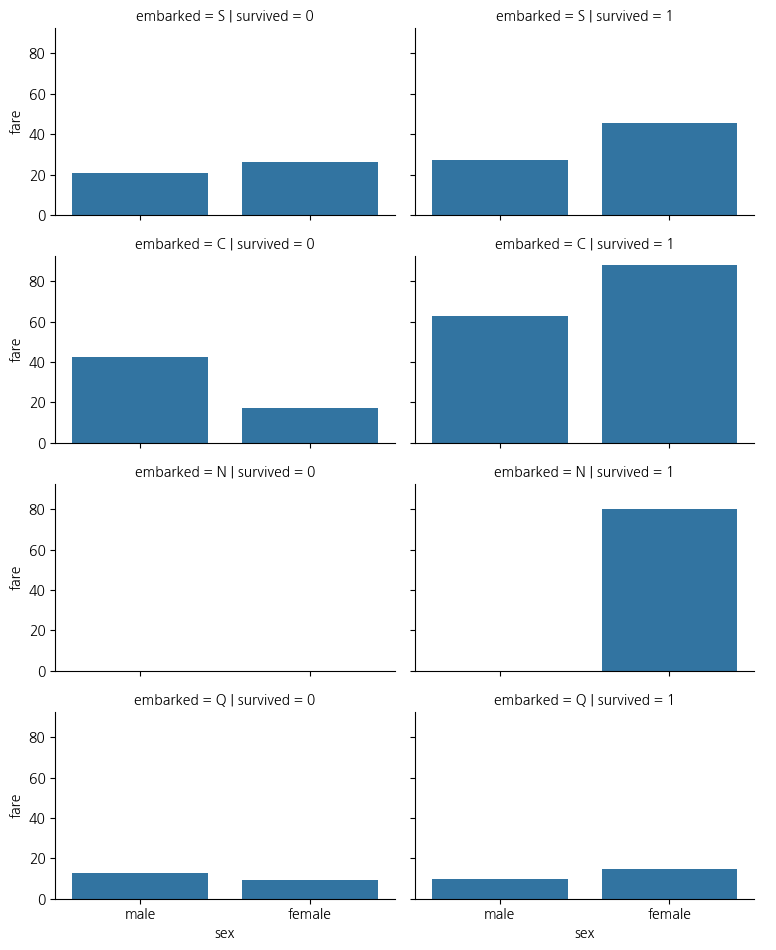

In [39]:
# 승선항, 생존여부, 성별에 따른 요금
grid = sns.FacetGrid(titanic_df, col = 'survived', row = 'embarked', height = 2.4, aspect = 1.6)
grid.map(sns.barplot, 'sex', 'fare', errorbar=None, order = ['male', 'female'])
grid.add_legend()

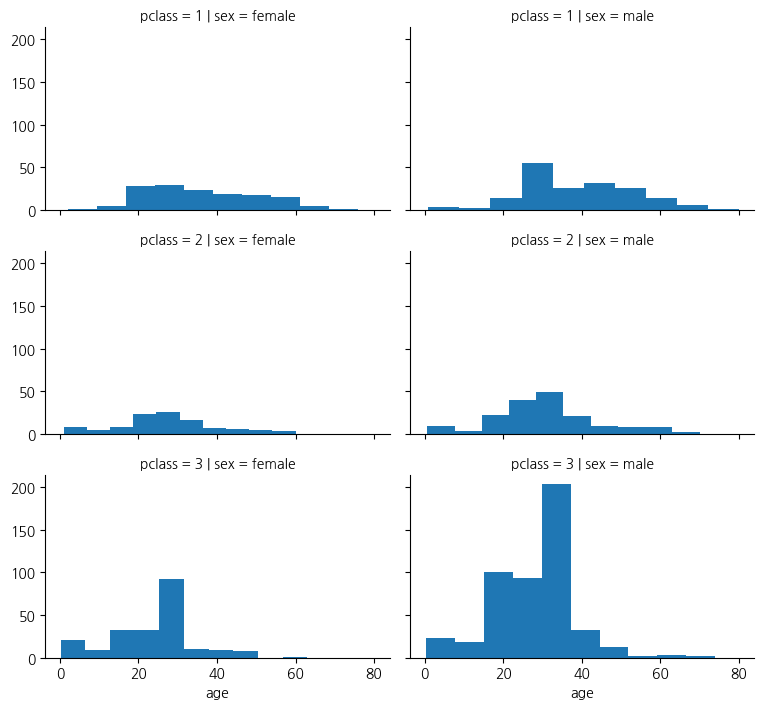

In [40]:
# 객실등급과 성별 연령별로 시각화
grid = sns.FacetGrid(titanic_df, col = 'sex', row = 'pclass', height = 2.4, aspect = 1.6)
grid.map(plt.hist, 'age')
grid.add_legend()

## 2-3. 데이터 인코딩

In [41]:
# 문자열 카테고리 피처를 인코딩
def encode_features(df):
    features = ['cabin', 'sex', 'embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [42]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,familySize,title
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,1,3,2,160.809917,"St Louis, MO",1,2
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,2,3,11,160.809917,"Montreal, PQ / Chesterville, ON",4,4
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,2,3,N,160.809917,"Montreal, PQ / Chesterville, ON",4,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,2,3,N,135.000000,"Montreal, PQ / Chesterville, ON",4,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,2,3,N,160.809917,"Montreal, PQ / Chesterville, ON",4,3


In [43]:
titanic_df['cabin'].unique()

array([1, 2, 4, 3, 0, 7, 8, 5, 6])

In [44]:
# 불필요 컬럼 삭제
# test_df를 사용하고자 할때는 별도로 다르게 제거해줘야 한다
titanic_df = titanic_df.drop(['name', 'ticket', 'boat', 'body', 'cabin', 'familySize', 'home.dest'], axis = 1, inplace = False)
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
0,1,1,0,29.00,0,0,211.3375,3,2
1,1,1,1,0.92,1,2,151.5500,3,4
2,1,0,0,2.00,1,2,151.5500,3,2
3,1,0,1,30.00,1,2,151.5500,3,1
4,1,0,0,25.00,1,2,151.5500,3,3


In [45]:
# 모델 예측을 위한 데이터 재호출
# titanic_df = pd.read_csv('./titanic3.csv')
y_titanic_df = titanic_df['survived']
X_titanic_df = titanic_df.drop(['survived'], axis = 1)

In [46]:
X_titanic_df.shape

(1309, 8)

In [47]:
y_titanic_df.shape

(1309,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.35, random_state = 12)

In [49]:
# 로지스틱회귀
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱 회귀 정확도: {0:.3f}'.format(accuracy_score(y_test, lr_pred)))

로지스틱 회귀 정확도: 0.800


In [50]:
# 랜덤포레스트
rf_clf = RandomForestClassifier(random_state = 12)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트 정확도: {0:.3f}'.format(accuracy_score(y_test, rf_pred)))

랜덤포레스트 정확도: 0.776


In [51]:
# 의사결정트리
dt_clf = DecisionTreeClassifier(random_state = 12)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('의사결정트리 정확도: {0:.3f}'.format(accuracy_score(y_test, rf_pred)))

의사결정트리 정확도: 0.776


In [52]:
# 앙상블 학습
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('RF', rf_clf), ('DT', dt_clf)], voting = 'soft')
vo_clf.fit(X_train, y_train)
vo_pred = vo_clf.predict(X_test)
print('앙상블 정확도: {0:.3f}'.format(accuracy_score(y_test, vo_pred)))

앙상블 정확도: 0.773
